# Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Trasformation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Model Building 
from sklearn.pipeline import Pipeline

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as asc

In [2]:
df = pd.read_csv('filteredRecords.csv')
df.head()

,text,label
0,It obvious glance story fullersearth merest fa...,A
1,Man least criminal lost enterprise originality...,A
2,I idea And king The King Scandinavia What Had ...,A
3,You wont shake hands I go Oh certainly would g...,A
4,Its big white yonder Theres twentysix makes us...,A


# Bag OF Words

In [92]:
vectorizer = CountVectorizer(max_features = 200)
X = vectorizer.fit_transform(df.text).toarray()
X.shape

(1000, 200)

In [93]:
BOW_df = pd.DataFrame(X,columns = cv.get_feature_names())
BOW_df.head()

,across,ah,always,and,another,antony,anything,arsène,as,ask,...,woman,words,work,works,would,years,yes,yet,you,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Text(0.5, 1.0, 'WordCount Transform')]

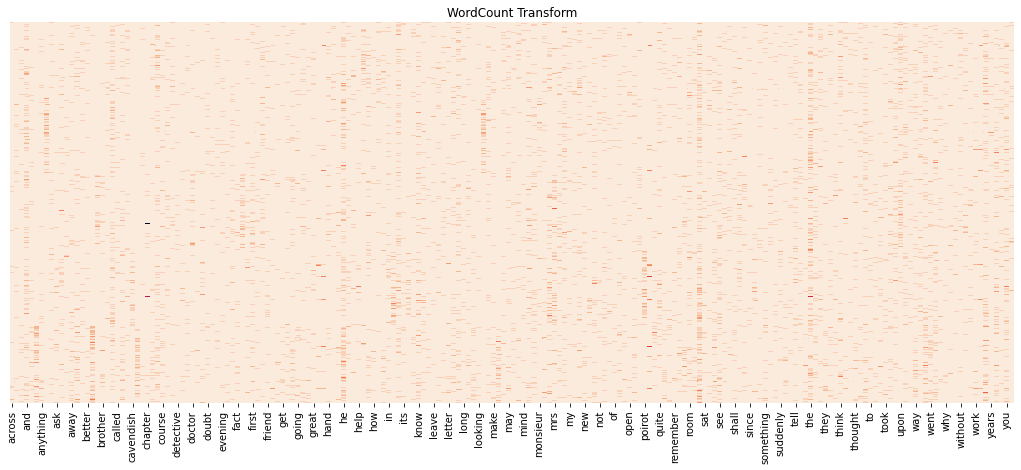

In [94]:
plt.figure(figsize=(18,7))
sns.heatmap(BOW_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='WordCount Transform')

# TF - IDF

In [95]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X).toarray()
X_tfidf.shape

(1000, 200)

In [117]:
TFIDF_df = pd.DataFrame(X_tfidf, columns = cv.get_feature_names())
TFIDF_df.head()

,across,ah,always,and,another,antony,anything,arsène,as,ask,...,woman,words,work,works,would,years,yes,yet,you,young
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.214885,0.0,0.0,0.0,0.000000,0.000000
1,0.280985,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.244630,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.275785
2,0.000000,0.0,0.0,0.181738,0.0,0.0,0.0,0.0,0.270619,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.194379,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.291716,...,0.0,0.0,0.0,0.0,0.360469,0.0,0.0,0.0,0.182422,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


[Text(0.5, 1.0, 'TF-IDF transform')]

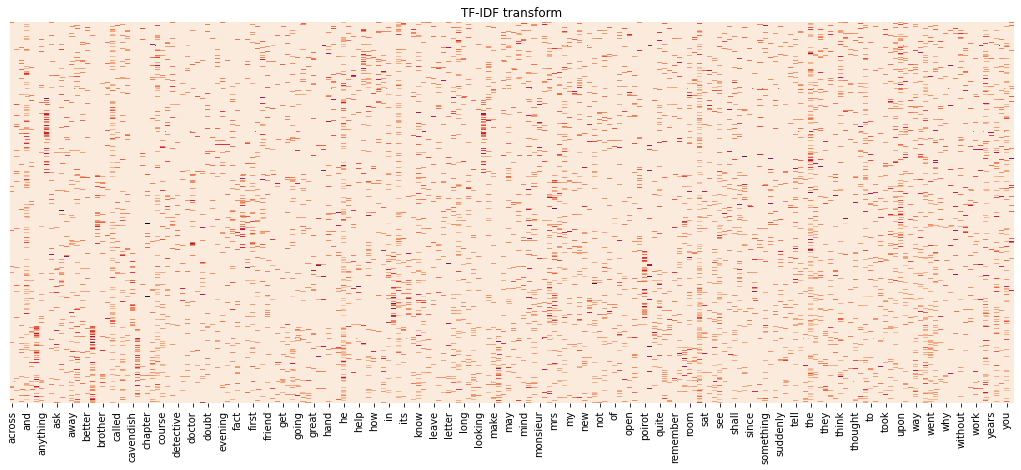

In [97]:
plt.figure(figsize=(18,7))
sns.heatmap(TFIDF_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='TF-IDF transform')

# N-Gram

# LDA

# Classifying with BOW vector space

## Data Splitting

In [120]:
X_train, X_test, y_train, y_test = train_test_split(BOW_df, df.label, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

print(X_train.shape, X_val.shape, X_test.shape)

(640, 200) (160, 200) (200, 200)


## Building models

In [121]:
algorithms = {
            'SVM' : SVC(),
            'DecisionTree' : DecisionTreeClassifier(),
            'KNN' : KNeighborsClassifier()
            }

trainAcc, valAcc, testAcc =[],[],[]

for model_name, model  in algorithms.items():
    pipeline = Pipeline(steps = [('classifier',model)])
    
    model = pipeline.fit(X_train,y_train)
    
    trainPreds = model.predict(X_train)
    valPreds = model.predict(X_val)
    testPreds = model.predict(X_test)
    
    trainAcc.append(asc(y_train, trainPreds))
    valAcc.append(asc(y_val,valPreds))
    testAcc.append(asc(y_test, testPreds))
    
tab_dict = {'modelName' : algorithms.keys(), 'train':trainAcc, 'validation':valAcc, 'test':testAcc}
results = pd.DataFrame(tab_dict)
results

,modelName,train,validation,test
0,SVM,0.954688,0.725,0.705
1,DecisionTree,0.989062,0.675,0.675
2,KNN,0.526563,0.350,0.390


Observation: SVM has fared better over others in terms of accuracy

# Classifying with TF-IDF vector space

## Data Splitting

In [118]:
X_train, X_test, y_train, y_test = train_test_split(TFIDF_df, df.label, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

print(X_train.shape, X_val.shape, X_test.shape)

(640, 200) (160, 200) (200, 200)


## Building models

In [119]:
algorithms = {
            'SVM' : SVC(),
            'DecisionTree' : DecisionTreeClassifier(),
            'KNN' : KNeighborsClassifier()
            }

trainAcc, valAcc, testAcc =[],[],[]

for model_name, model  in algorithms.items():
    pipeline = Pipeline(steps = [('classifier',model)])
    
    model = pipeline.fit(X_train,y_train)
    
    trainPreds = model.predict(X_train)
    valPreds = model.predict(X_val)
    testPreds = model.predict(X_test)
    
    trainAcc.append(asc(y_train, trainPreds))
    valAcc.append(asc(y_val,valPreds))
    testAcc.append(asc(y_test, testPreds))
    
tab_dict = {'modelName' : algorithms.keys(), 'train':trainAcc, 'validation':valAcc, 'test':testAcc}
results = pd.DataFrame(tab_dict)
results

,modelName,train,validation,test
0,SVM,0.979688,0.72500,0.680
1,DecisionTree,0.989062,0.66875,0.685
2,KNN,0.773438,0.63750,0.615


## Error Analysis

In [ ]:
# BOW_df['OUT_LBL'] = df.label
# TFIDF_df['OUT_LBL'] = df.label

# # define cv
# cv = KFold(n_splits = 10, random_state = 42, shuffle = True)